# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [3]:
#your code here
spaceship.shape 

(8693, 14)

**Check for data types**

In [4]:
#your code here
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for missing values**

In [5]:
#your code here
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

### Reasoning of handling missing data. 
After checking the calues. I will drop the spaceship['Cabin'] fill object types with mode and the same with float64 and mean. Since Names are quite unique. and we don't know the Gender of each passenger I have decided to do a fillna of J. D. Which means John Doe or Jane Doe.

In [6]:
#your code here
def fill_missing_values(spaceship):
    for column in spaceship.columns:
        if column in ["Cabin", "Name"]:
            continue
        if spaceship[column].dtype == 'float64':
            spaceship[column].fillna(spaceship[column].mean(), inplace=True)
        elif spaceship[column].dtype == 'object':
            spaceship[column].fillna(spaceship[column].mode()[0], inplace=True)
    
    # Special case for 'Name' column
    spaceship['Name'].fillna('J. D.', inplace=True)

    return spaceship

# Apply the function to DataFrame
spaceship = fill_missing_values(spaceship)

#Drop the 'Cabin' column
spaceship.drop(columns=['Cabin'], inplace=True)

# Verify that there are no remaining missing values
print(spaceship.isnull().sum())

# Output the DataFrame to ensure correct replacements
spaceship.head()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
spaceship.info()
df = spaceship

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Name          8693 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(4)
memory usage: 704.7+ KB


NameError: name 'sns' is not defined

**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [ ]:
#your code here
numerical_spaceship = df.select_dtypes(include=['float64','bool'])
numerical_spaceship

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


And also lets define our target.

In [ ]:
#your code here
features = numerical_spaceship.drop(columns = ["Transported"])
target = numerical_spaceship["Transported"]

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [ ]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [ ]:
#your code here
knn = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_19 = KNeighborsClassifier(n_neighbors=19)
knn_50 = KNeighborsClassifier(n_neighbors=50)

Fit the model to your data.

In [ ]:
#your code here
knn.fit(X_train, y_train)
knn_5.fit(X_train, y_train)
knn_19.fit(X_train, y_train)
knn_50.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

Evaluate your model.

In [ ]:
print('R-squared of knn 3: ',knn.score(X_test, y_test))
print('R-squared of knn 5: ',knn_5.score(X_test, y_test))
print('R-squared of knn 19: ',knn_19.score(X_test, y_test))
print('R-squared of knn 50: ',knn_50.score(X_test, y_test))

R-squared of knn 3:  0.7222541690626797
R-squared of knn 5:  0.7441058079355952
R-squared of knn 19:  0.7786083956296722
R-squared of knn 50:  0.7826336975273146


The model accuracy is okayish... It could definitely be better, but we have something to work on. 

In [ ]:
pred_3 = knn.predict(X_test) 
pred_5 = knn_5.predict(X_test)
pred_19 = knn_19.predict(X_test)
pred_50 = knn_50.predict(X_test)

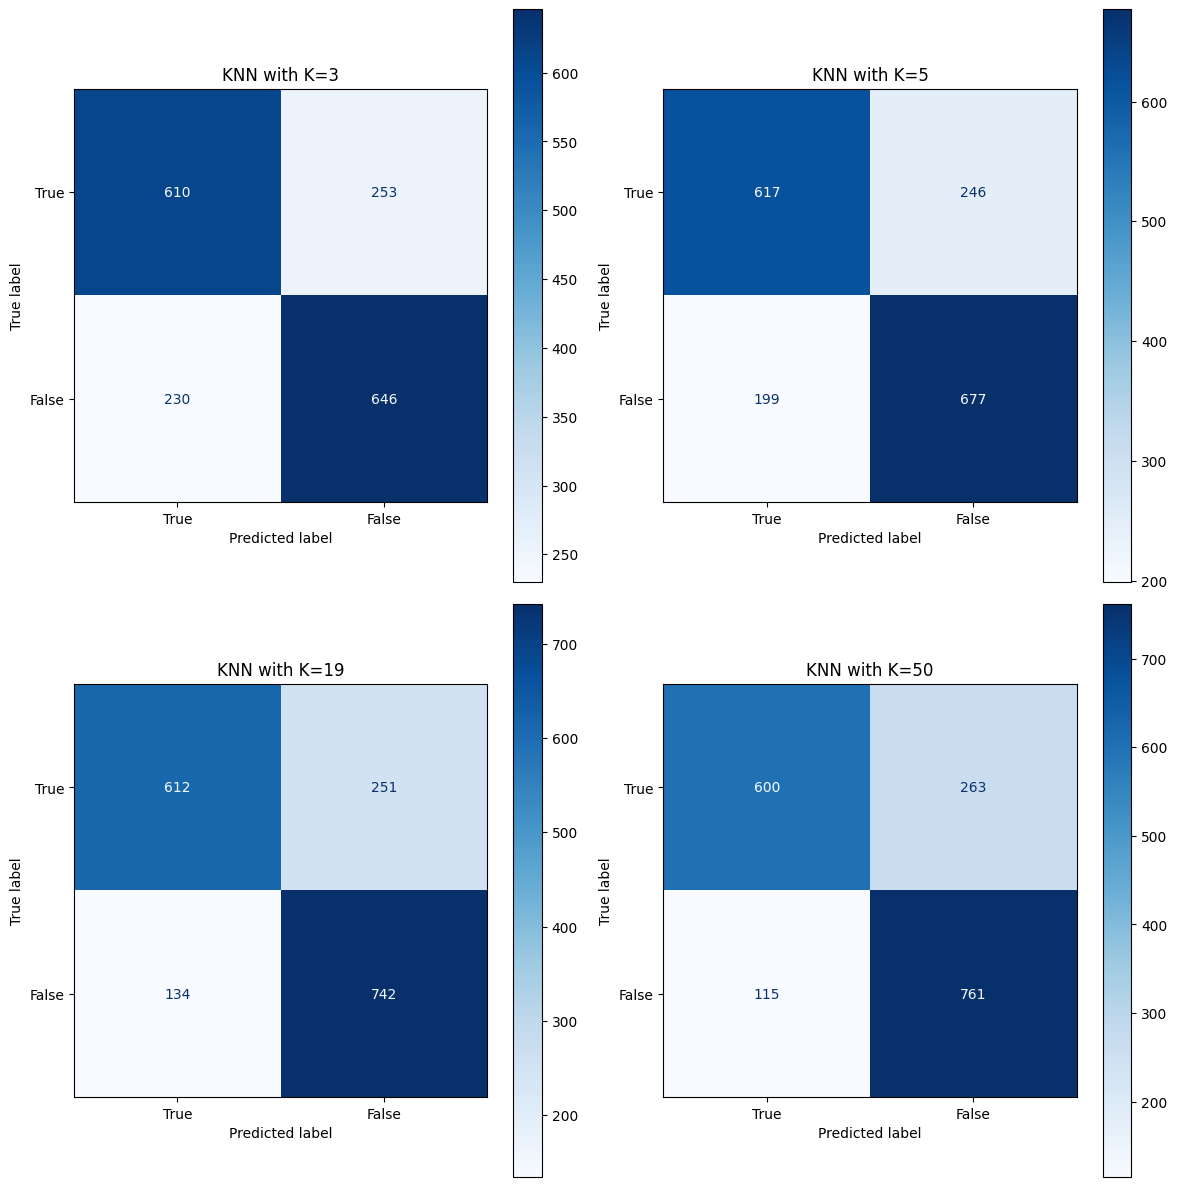

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Confusion matrix for K=3
cm_3 = confusion_matrix(y_test, pred_3)
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=[True, False])
disp_3.plot(ax=axes[0, 0], cmap=plt.cm.Blues)
axes[0, 0].set_title('KNN with K=3')

# Confusion matrix for K=5
cm_5 = confusion_matrix(y_test, pred_5)
disp_5 = ConfusionMatrixDisplay(confusion_matrix=cm_5, display_labels=[True, False])
disp_5.plot(ax=axes[0, 1], cmap=plt.cm.Blues)
axes[0, 1].set_title('KNN with K=5')

# Confusion matrix for K=19
cm_19 = confusion_matrix(y_test, pred_19)
disp_19 = ConfusionMatrixDisplay(confusion_matrix=cm_19, display_labels=[True, False])
disp_19.plot(ax=axes[1, 0], cmap=plt.cm.Blues)
axes[1, 0].set_title('KNN with K=19')

# Confusion matrix for K=50
cm_50 = confusion_matrix(y_test, pred_50)
disp_50 = ConfusionMatrixDisplay(confusion_matrix=cm_50, display_labels=[True, False])
disp_50.plot(ax=axes[1, 1], cmap=plt.cm.Blues)
axes[1, 1].set_title('KNN with K=50')

# Adjust layout and display
plt.tight_layout()
plt.show()

**Congratulations, you have just developed your first Machine Learning model!**